# Data Collection

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from tensorflow.keras.layers import Input, Add, Activation, Lambda, Embedding, Reshape, Dot

%matplotlib inline

In [118]:
!gdown --id "1FuRZhGKHEYLN4qoEzEKF2A7tuAG0fPyj"

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FuRZhGKHEYLN4qoEzEKF2A7tuAG0fPyj
To: /content/Coursera.csv
100% 5.28M/5.28M [00:00<00:00, 66.1MB/s]


In [119]:
courses = pd.read_csv("/content/Coursera.csv")
courses.head(10)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
5,Building Test Automation Framework using Selen...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/building-test-a...,Selenium is one of the most widely used functi...,maintenance test case test automation scree...
6,Doing Business in China Capstone,The Chinese University of Hong Kong,Advanced,3.3,https://www.coursera.org/learn/doing-business-...,Doing Business in China Capstone enables you t...,marketing plan Planning Marketing consumpti...
7,"Programming Languages, Part A",University of Washington,Intermediate,4.9,https://www.coursera.org/learn/programming-lan...,This course is an introduction to the basic co...,inference ml (programming language) higher-o...
8,The Roles and Responsibilities of Nonprofit Bo...,The State University of New York,Intermediate,4.3,https://www.coursera.org/learn/nonprofit-gov-2,This course provides a more in-depth look at t...,Planning Peer Review fundraising strategic ...
9,Business Russian Communication. Part 3,Saint Petersburg State University,Intermediate,Not Calibrated,https://www.coursera.org/learn/business-russia...,Russian is considered to be one of the most di...,Russian market (economics) tax exemption co...


# Data Understanding


In [120]:
courses.shape

(3522, 7)

In [121]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [122]:
courses.describe()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
count,3522,3522,3522,3522,3522,3522,3522
unique,3416,184,5,31,3424,3397,3424
top,Google Cloud Platform Fundamentals: Core Infra...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
freq,8,562,1444,740,8,8,8


In [123]:
courses['Course Name']

,Course Name
0,Write A Feature Length Screenplay For Film Or ...
1,Business Strategy: Business Model Canvas Analy...
2,Silicon Thin Film Solar Cells
3,Finance for Managers
4,Retrieve Data using Single-Table SQL Queries
...,...
3517,"Capstone: Retrieving, Processing, and Visualiz..."
3518,Patrick Henry: Forgotten Founder
3519,Business intelligence and data analytics: Gene...
3520,Rigid Body Dynamics


In [124]:
courses['University'].value_counts()

,count
University,
Coursera Project Network,562
University of Illinois at Urbana-Champaign,138
Johns Hopkins University,110
University of Michigan,101
University of Colorado Boulder,101
...,...
GitLab,1
Yeshiva University,1
University of Glasgow,1


In [125]:
courses['Difficulty Level'].value_counts()

,count
Difficulty Level,
Beginner,1444
Advanced,1005
Intermediate,837
Conversant,186
Not Calibrated,50


In [126]:
courses['Course Rating'].value_counts()

,count
Course Rating,
4.7,740
4.6,623
4.8,598
4.5,389
4.4,242
4.9,180
4.3,165
4.2,121
5,90


In [127]:
courses['Skills'].value_counts()

,count
Skills,
Google Cloud Platform Big Data Cloud Infrastructure google storage Cloud Storage bigquery Cloud Platforms Kubernetes Cloud Computing Google App Engine information-technology cloud-computing,8
art listening emotions Sound Design music signature Audio Production Writing microphone sound arts-and-humanities music-and-art,4
Python Programming python libraries analysis semantics Computer Programming syntax Data Analysis Pandas python syntax and semantics Numpy data-science data-analysis,4
analysis Machine Learning Data Mining Artificial Neural Networks Regression Analysis Data Analysis data reporting Human Learning Regression Big Data data-science data-analysis,4
Machine Learning artificial general intelligence application domain ethics of artificial intelligence Human Learning language Artificial Neural Networks Computer Vision ethics Deep Learning data-science machine-learning,4
...,...
music re-define h.e.a.r. publicity Social Media popular music Planning Payments label Audio Recording arts-and-humanities music-and-art,1
microbiology nutrition metagenomics probiotics probiotic biology food allergy allergy microbiota thought life-sciences basic-science,1
Management Accounting cost benefit analysis Finance Profit Analysis Financial Accounting Accounting Leadership and Management contribution margin cost allocation cost business finance,1


In [128]:
courses.head(5)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


# Data Preparation


In [129]:
import numpy as np
import itertools

In [130]:
# Drop outliers menggunakan IQR
# Select only numerical columns for quantile calculation
numerical_courses = courses.select_dtypes(include=np.number)

Q1 = numerical_courses.quantile(0.25)
Q3 = numerical_courses.quantile(0.75)
IQR = Q3 - Q1

# Filter the original DataFrame based on the IQR of numerical columns
course = courses[~((numerical_courses < (Q1 - 1.5 * IQR)) | (numerical_courses > (Q3 + 1.5 * IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
course.shape

(3522, 7)

In [131]:
# Mengatasi missing value
course.isnull().sum()

,0
Course Name,0
University,0
Difficulty Level,0
Course Rating,0
Course URL,0
Course Description,0
Skills,0


In [132]:
# Mengambil kolom yang diperlukan
courses = course[['Course Name','Course Rating', 'Course Description', 'Skills']]

In [133]:
# Mengubah nama kolom
courses = courses.rename(columns={
    'Course Name': 'courseName',
    'Course Rating': 'rating',
    'Course Description': 'description',
    'Skills': 'skills'
})

In [134]:
courses = courses.merge(courses[['courseName', 'description']], on='courseName')
courses.head()

,courseName,rating,description_x,skills,description_y
0,Write A Feature Length Screenplay For Film Or ...,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Write a Full Length Feature Film Script In th...
1,Business Strategy: Business Model Canvas Analy...,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,"By the end of this guided project, you will be..."
2,Silicon Thin Film Solar Cells,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,This course consists of a general presentation...
3,Finance for Managers,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,"When it comes to numbers, there is always more..."
4,Retrieve Data using Single-Table SQL Queries,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,In this course you�ll learn how to effectively...


In [135]:
# Exclude rating yang ingin dihapus dari dataset
courses = courses[courses['rating'] != 'Not Calibrated']

# Reset index dataframe untuk menghindari error
courses = courses.reset_index(drop = True)

# Convert "rating" column to int64 data type
courses['rating'] = pd.to_numeric(courses['rating'])

In [136]:
courses.head(5)

,courseName,rating,description_x,skills,description_y
0,Write A Feature Length Screenplay For Film Or ...,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Write a Full Length Feature Film Script In th...
1,Business Strategy: Business Model Canvas Analy...,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,"By the end of this guided project, you will be..."
2,Silicon Thin Film Solar Cells,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,This course consists of a general presentation...
3,Finance for Managers,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,"When it comes to numbers, there is always more..."
4,Retrieve Data using Single-Table SQL Queries,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,In this course you�ll learn how to effectively...


In [137]:
course_list = courses.courseName.str.split("|").tolist()
course = list(set(itertools.chain(*course_list)))
course = list(set(course))

In [138]:
skills_list = courses.skills.str.split("|").tolist()
skills = list(set(itertools.chain(*skills_list)))
skills = list(set(skills))

# Model Development dengan Content Based Filtering

TF-IDF Vectorizer

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer(token_pattern=r"(?u)\b\w[\w-]*\w\b")

# Melakukan perhitungan idf pada data cuisine
tf.fit(courses['courseName'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['000', '10', '101', ..., 'zap', 'zero', 'zoning'], dtype=object)

In [140]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(courses['courseName'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(3740, 3628)

In [141]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [142]:
# Membuat dataframe untuk melihat tf-idf matrix
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=courses.skills
).sample(10, axis=1).sample(10, axis=0)

,gesti,loops,real-time,presented,facilitating,x-ray,aspectos,landscapes,goals,schizophrenia
skills,,,,,,,,,,
Accounting Financial Accounting Accounting Analysis Account Analysis financial statement analysis Finance revenue revenue recognition international financial reporting standards business business-essentials,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
meditation emotion happiness gratitude positive psychology kindness mindfulness psychology emotions psychologies life-sciences psychology,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Leadership Development Negotiation leadership Collaboration team management strategic leadership Leadership and Management leadership style Team Building Communication business leadership-and-management,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
materials modeling Degrees Of Freedom beam robotics behavior lecture analysis Pressure Sensor Welding ordered pair physical-science-and-engineering mechanical-engineering,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
autoregressive model Time Series Time Series Forecasting series a round time series models Autoregressive Integrated Moving Average Time Series Analysis Forecasting analysis modeling data-science probability-and-statistics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
specification (technical standard) approximation collimator optics algorithm c dynamic memory allocation telecentric lens beam robotics Systems Design physics scalar field physical-science-and-engineering electrical-engineering,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Writing english language editing english grammar language academic writing grammar Civil Engineering punctuation Communication language-learning learning-english,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
interpersonal relationships conflict resolution listening Leadership and Management educational psychology sociology active listening Communication Employee Relations Collaboration business business-essentials,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Google Cloud Platform Big Data Cloud Infrastructure google storage Cloud Storage bigquery Cloud Platforms Kubernetes Cloud Computing Google App Engine information-technology cloud-computing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cosine Similarity

In [143]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.15356638, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.15163383, 0.        ,
        0.0421248 ],
       [0.15356638, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.15163383, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.0421248 , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [144]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama course
cosine_sim_df = pd.DataFrame(cosine_sim, index=courses['courseName'], columns=courses['courseName'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap course
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (3740, 3740)


courseName,Neural Network Visualizer Web App with Python,Real-Time Cyber Threat Detection and Mitigation,Introduction to Business Analytics with R,Capstone Project � Analyzing a Real Transaction,Access Controls,Water Supply and Sanitation Policy in Developing Countries Part 2: Developing Effective Interventions,Think Again I: How to Understand Arguments,Classical Sociological Theory,Internet of Things: Setting Up Your DragonBoard� Development Platform,Current Gen 3D Game Prop Production
courseName,,,,,,,,,,
Introduction to Breast Cancer,0.000000,0.000000,0.225996,0.0,0.0,0.000000,0.050957,0.0,0.000000,0.0
"Compensation, Expenses and Quotas",0.000000,0.022509,0.000000,0.0,0.0,0.016115,0.000000,0.0,0.000000,0.0
The Worldview of Thomas Berry: The Flourishing of the Earth Community,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.050575,0.0
Introduction to G Suite,0.000000,0.000000,0.317228,0.0,0.0,0.000000,0.071528,0.0,0.000000,0.0
"Android App Components - Services, Local IPC, and Content Providers",0.104387,0.016642,0.000000,0.0,0.0,0.011915,0.000000,0.0,0.000000,0.0
API Design and Fundamentals of Google Cloud's Apigee API Platform,0.000000,0.017671,0.000000,0.0,0.0,0.012652,0.000000,0.0,0.099855,0.0
Sustainable Innovation for Subsistence Marketplaces,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
Network Security & Database Vulnerabilities,0.175410,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
Transmedia Writing,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0


In [145]:
print(cosine_sim_df.sample(5, axis=1).sample(10, axis=0).to_markdown())

| courseName                                                                             |   Distributed Programming in Java |   Industrial Biotechnology |   Databases and SQL for Data Science |   Javascript animation for websites, storytelling, data visualization and games |   Introduction to MongoDB |
|:---------------------------------------------------------------------------------------|----------------------------------:|---------------------------:|-------------------------------------:|--------------------------------------------------------------------------------:|--------------------------:|
| Compassionate Leadership Through Service Learning with Jane Goodall and Roots & Shoots |                                 0 |                          0 |                            0.0210759 |                                                                       0.013104  |                         0 |
| Elastic Google Cloud Infrastructure: Scaling and Automation                        

Euclidean Distance

In [146]:
# Menghitung euclidean distance pada matrix tf-idf
euclidean_dist = euclidean_distances(tfidf_matrix)

# Membuat dataframe dari variabel euclidean_dist dengan baris dan kolom berupa nama course
euclidean_dist_df = pd.DataFrame(euclidean_dist, index=courses.courseName, columns=courses.courseName)

In [147]:
euclidean_dist_df.sample(5, axis=1).sample(10, axis=0)

courseName,Data Collection and Processing with Python,Extracellular Vesicles in Health and Disease,Big Data Modeling and Management Systems,Create Power-Ups and Obstacles with C# in Unity,Google Cloud Platform Fundamentals: Core Infrastructure
courseName,,,,,
Collegiate Esports and Career Planning,1.391655,1.396352,1.391115,1.396928,1.414214
Strategy Implementation,1.414214,1.414214,1.414214,1.414214,1.414214
Global Warming I: The Science and Modeling of Climate Change,1.394018,1.398221,1.238892,1.398736,1.414214
Elastic Google Cloud Infrastructure: Scaling and Automation,1.390838,1.395707,1.390278,1.396303,1.135187
Introduction to Complex Analysis,1.414214,1.414214,1.414214,1.414214,1.414214
Russian History: from Lenin to Putin,1.414214,1.414214,1.414214,1.414214,1.414214
Introduction to Acoustics (Part 2),1.414214,1.414214,1.414214,1.414214,1.414214
Analysis of Variance with ANOVA in Google Sheets,1.373749,1.383864,1.414214,1.353216,1.346069
Getting Started with AWS Machine Learning,1.364092,1.414214,1.414214,1.375899,1.414214


In [148]:
print(euclidean_dist_df.sample(5, axis=1).sample(10, axis=0).to_markdown())

| courseName                                                             |   Google Cloud Platform Fundamentals: Core Infrastructure |   Music Business Foundations |   Content Strategy for Professionals: Expanding Your Content�s Reach |   API Development on Google Cloud's Apigee API Platform |   Bioinformatic Methods I |
|:-----------------------------------------------------------------------|----------------------------------------------------------:|-----------------------------:|---------------------------------------------------------------------:|--------------------------------------------------------:|--------------------------:|
| Arts and Heritage Management                                           |                                                   1.41421 |                      1.41421 |                                                              1.41421 |                                                 1.41421 |                   1.41421 |
| Cybersecurity Capstone:  Brea

# Model Development dengan Collaborative Filtering

In [149]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [150]:
# Mengubah courseName menjadi list tanpa nilai yang sama
course_name_list_id = courses['courseName'].unique().tolist()
print('list courseName: ', course_name_list_id)

# Melakukan encoding courseName (cn)
cn_to_cn_encoded = {x: i for i, x in enumerate(course_name_list_id)}
print('encoded courseName : ', cn_to_cn_encoded)

# Melakukan proses encoding angka ke ke courseName (cn)
cn_encoded_to_cn = {i: x for i, x in enumerate(course_name_list_id)}
print('encoded angka ke courseName: ', cn_encoded_to_cn)

list courseName:  ['Write A Feature Length Screenplay For Film Or Television', 'Business Strategy: Business Model Canvas Analysis with Miro', 'Silicon Thin Film Solar Cells', 'Finance for Managers', 'Retrieve Data using Single-Table SQL Queries', 'Building Test Automation Framework using Selenium and TestNG', 'Doing Business in China Capstone', 'Programming Languages, Part A', 'The Roles and Responsibilities of Nonprofit Boards of Directors within the Governance Process', 'Agile Projects:  Developing Tasks with Taiga', 'Esports Management Capstone Project', 'Hacking and Patching', 'Business Statistics and Analysis Capstone', 'Grab Data Fast with Vertical and Horizontal LOOKUP', 'Global Health: An Interdisciplinary Overview', 'Python Programming Essentials', 'Creating Dashboards and Storytelling with Tableau', 'Parallel programming', 'Recommendation Systems with TensorFlow on GCP', 'The Changing Arctic', 'COVID-19 - A clinical update', 'How to Create Text Effects in GIMP', 'Preparing fo

In [151]:
# Mengubah skills menjadi list tanpa nilai yang sama
skill_list_id = courses['skills'].unique().tolist()
print('list skills: ', skill_list_id)

# Melakukan encoding skills
skill_to_skill_encoded = {x: i for i, x in enumerate(skill_list_id)}
print('encoded skills : ', skill_to_skill_encoded)

# Melakukan proses encoding angka ke ke skills
skill_encoded_to_skill = {i: x for i, x in enumerate(skill_list_id)}
print('encoded angka ke skills: ', skill_encoded_to_skill)

list skills:  ['Drama  Comedy  peering  screenwriting  film  Document Review  dialogue  creative writing  Writing  unix shells arts-and-humanities music-and-art', 'Finance  business plan  persona (user experience)  business model canvas  Planning  Business  project  Product Development  presentation  Strategy business business-strategy', 'chemistry  physics  Solar Energy  film  lambda calculus  Electrical Engineering  electronics  energy  silicon  thinning physical-science-and-engineering electrical-engineering', 'accounts receivable  dupont analysis  analysis  Accounting  Finance  Operations Management  Leadership and Management  balance sheet  inventory  Financial Analysis business finance', 'Data Analysis  select (sql)  database management systems  online shopping  table (database)  data retrieval  Databases  web page  numbers (spreadsheet)  SQL information-technology data-management', 'maintenance  test case  test automation  screenshot  project  helper class  selenium  reusability

In [152]:
# Mapping courseName list ke dataframe courses
courses['courses_df'] = courses['courseName'].map(cn_to_cn_encoded)

# Mapping skills ke dataframe skills
courses['skills_df'] = courses['skills'].map(skill_to_skill_encoded)

In [153]:
courses

,courseName,rating,description_x,skills,description_y,courses_df,skills_df
0,Write A Feature Length Screenplay For Film Or ...,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Write a Full Length Feature Film Script In th...,0,0
1,Business Strategy: Business Model Canvas Analy...,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,"By the end of this guided project, you will be...",1,1
2,Silicon Thin Film Solar Cells,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,This course consists of a general presentation...,2,2
3,Finance for Managers,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,"When it comes to numbers, there is always more...",3,3
4,Retrieve Data using Single-Table SQL Queries,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,In this course you�ll learn how to effectively...,4,4
...,...,...,...,...,...,...,...
3735,"Capstone: Retrieving, Processing, and Visualiz...",4.6,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...,"In the capstone, students will build a series ...",3329,3337
3736,Patrick Henry: Forgotten Founder,4.9,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...,"�Give me liberty, or give me death:� Rememberi...",3330,3338
3737,Business intelligence and data analytics: Gene...,4.6,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...,�Megatrends� heavily influence today�s organis...,3331,3339
3738,Rigid Body Dynamics,4.6,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...,"This course teaches dynamics, one of the basic...",3332,3340


In [154]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   courseName     3740 non-null   object 
 1   rating         3740 non-null   float64
 2   description_x  3740 non-null   object 
 3   skills         3740 non-null   object 
 4   description_y  3740 non-null   object 
 5   courses_df     3740 non-null   int64  
 6   skills_df      3740 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 204.7+ KB


In [155]:
# Mendapatkan jumlah courseName
num_courses = len(cn_to_cn_encoded)

# Mendapatkan jumlah skills
num_skills = len(skill_to_skill_encoded)

# Nilai minimum rating
min_rating = min(courses['rating'])

# Nilai maksimal rating
max_rating = max(courses['rating'])

print('Number of Course: {}, Number of Skill: {}, Min rating: {}, Max rating: {}'.format(
    num_courses, num_skills, min_rating, max_rating
))

Number of Course: 3334, Number of Skill: 3342, Min rating: 1.0, Max rating: 5.0


Split Data to Train & Test

In [156]:
# Mengacak dataset
df = courses.sample(frac=1, random_state=42)
df

,courseName,rating,description_x,skills,description_y,courses_df,skills_df
3395,Effective Communication Capstone Project,4.2,In the Effective Communication Capstone learne...,Communication Business Communication coffee ...,In the Effective Communication Capstone learne...,3072,3078
1114,Fundamentals of Modern Russian-designed NPPs w...,5.0,The goal of the course is to present the press...,p versus np problem spent nuclear fuel physi...,The goal of the course is to present the press...,1026,1026
351,Fundamentals of Immunology: T Cells and Signaling,4.8,Course 2 of a three course specialization call...,biochemistry biology immune system cell sig...,Course 2 of a three course specialization call...,322,322
1983,Natural Language Processing,4.0,This course covers a wide range of tasks in Na...,language modeling n-gram named-entity recog...,This course covers a wide range of tasks in Na...,1811,1813
2320,Violence Against Healthcare,4.4,"At the global level, there are many countries ...",emergency violence humanitarian prioritizat...,"At the global level, there are many countries ...",2121,2123
...,...,...,...,...,...,...,...
1130,Elastic Google Cloud Infrastructure: Scaling a...,4.7,This accelerated on-demand course introduces p...,Cloud Platforms virtual private networks Goo...,This accelerated on-demand course introduces p...,691,691
1294,Video Basics with OpenCV and Python,4.1,"In this 1-hour long project-based course, you ...",saving Computer Programming opencv face rec...,"In this 1-hour long project-based course, you ...",1190,1190
860,Crafting Strategies for Innovation Initiatives...,4.2,This course focuses on enhancing your understa...,� Managers seeking to assemble creative peopl...,This course focuses on enhancing your understa...,793,793
3507,How to Validate your Startup Idea,4.4,Starting a new business begins with an idea th...,real estate investing minimum viable product ...,Starting a new business begins with an idea th...,3161,3169


In [157]:
# Membuat variabel x untuk mencocokkan dataframe courses dan skills menjadi satu value
x = df[['courses_df', 'skills_df']].values

# Membuat variabel y untuk membuat rating menjadi skala 0 sampai 1
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 90% data train dan 10% data validasi
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[3072 3078]
 [1026 1026]
 [ 322  322]
 ...
 [ 793  793]
 [3161 3169]
 [2871 2876]] [0.8  1.   0.95 ... 0.8  0.85 0.85]


# Training Model

In [158]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_courses, num_skills, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_courses = num_courses
    self.num_skills = num_skills
    self.embedding_size = embedding_size
    self.course_embedding = keras.layers.Embedding( # layer embedding course
        num_courses,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.course_bias = keras.layers.Embedding(num_courses, 1) # layer embedding course bias
    self.skill_embedding = keras.layers.Embedding( # layer embeddings skill
        num_skills,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.skill_bias = keras.layers.Embedding(num_skills, 1) # layer embedding skill bias

  def call(self, inputs):
    course_vector = self.course_embedding(inputs[:,0]) # memanggil layer embedding 1
    course_bias = self.course_bias(inputs[:, 0]) # memanggil layer embedding 2
    skill_vector = self.skill_embedding(inputs[:, 1]) # memanggil layer embedding 3
    skill_bias = self.skill_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_course_skill = tf.tensordot(course_vector, skill_vector, 2)

    x = dot_course_skill + course_bias + skill_bias

    return tf.nn.sigmoid(x) # activation sigmoid


In [159]:
model = RecommenderNet(num_courses, num_skills, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [160]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (x_val, y_val),
)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6697 - root_mean_squared_error: 0.3839 - val_loss: 0.5654 - val_root_mean_squared_error: 0.3118
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4161 - root_mean_squared_error: 0.1734 - val_loss: 0.4661 - val_root_mean_squared_error: 0.2291
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3533 - root_mean_squared_error: 0.0913 - val_loss: 0.4450 - val_root_mean_squared_error: 0.2090
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3453 - root_mean_squared_error: 0.0844 - val_loss: 0.4493 - val_root_mean_squared_error: 0.2124
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3449 - root_mean_squared_error: 0.0813 - val_loss: 0.4564 - val_root_mean_squared_error: 0.2189
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3462 - root_mean_squared_error: 0.0831 - val_loss: 0.4681 - val_root_mean_squared_error: 0.2295
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.345

Metric Visualization

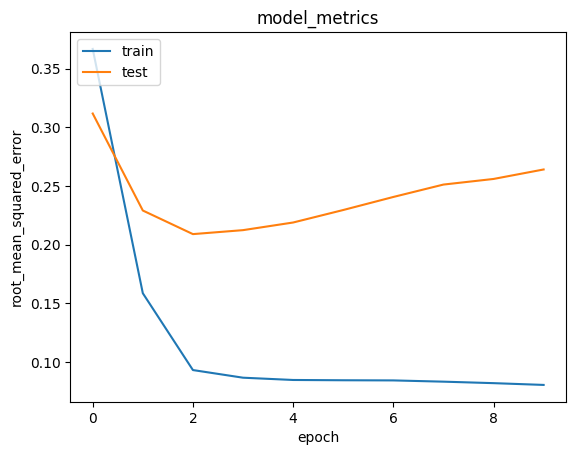

In [161]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Get course recommendation

In [162]:
courses

,courseName,rating,description_x,skills,description_y,courses_df,skills_df
0,Write A Feature Length Screenplay For Film Or ...,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Write a Full Length Feature Film Script In th...,0,0
1,Business Strategy: Business Model Canvas Analy...,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,"By the end of this guided project, you will be...",1,1
2,Silicon Thin Film Solar Cells,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,This course consists of a general presentation...,2,2
3,Finance for Managers,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,"When it comes to numbers, there is always more...",3,3
4,Retrieve Data using Single-Table SQL Queries,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,In this course you�ll learn how to effectively...,4,4
...,...,...,...,...,...,...,...
3735,"Capstone: Retrieving, Processing, and Visualiz...",4.6,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...,"In the capstone, students will build a series ...",3329,3337
3736,Patrick Henry: Forgotten Founder,4.9,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...,"�Give me liberty, or give me death:� Rememberi...",3330,3338
3737,Business intelligence and data analytics: Gene...,4.6,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...,�Megatrends� heavily influence today�s organis...,3331,3339
3738,Rigid Body Dynamics,4.6,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...,"This course teaches dynamics, one of the basic...",3332,3340


In [163]:
# Mengambil sample course
course_sample = df.courses_df.sample(1).iloc[0]

# Mengambil course sesuai sample course
courses_enrolled = courses[courses.courses_df == course_sample]
courses_enrolled

,courseName,rating,description_x,skills,description_y,courses_df,skills_df
2524,Writing Stories About Ourselves,3.7,"In this course, creative nonfiction writers wi...",film Writing Fiction Writing essay writing ...,"In this course, creative nonfiction writers wi...",2308,2311


In [164]:
# Mengambil course yang tidak di-enroll
# Operator bitwise (~), https://docs.python.org/3/reference/expressions.html
courses_not_enrolled = courses[~courses['courseName'].isin(courses_enrolled.courseName.values)]['courseName']
print("Course not enrolled:", courses_not_enrolled)
courses_not_enrolled = list(
    set(courses_not_enrolled)
    .intersection(set(cn_to_cn_encoded.keys()))
)

Course not enrolled: 0       Write A Feature Length Screenplay For Film Or ...
1       Business Strategy: Business Model Canvas Analy...
2                           Silicon Thin Film Solar Cells
3                                    Finance for Managers
4            Retrieve Data using Single-Table SQL Queries
                              ...                        
3735    Capstone: Retrieving, Processing, and Visualiz...
3736                     Patrick Henry: Forgotten Founder
3737    Business intelligence and data analytics: Gene...
3738                                  Rigid Body Dynamics
3739    Architecting with Google Kubernetes Engine: Pr...
Name: courseName, Length: 3739, dtype: object


In [165]:
# Encoding course_not_enrolled dengan sample skill
courses_not_enrolled = [[cn_to_cn_encoded.get(x)] for x in courses_not_enrolled]
courses_not_enrolled

[[1681],
 [3212],
 [1815],
 [1649],
 [2459],
 [514],
 [1173],
 [3298],
 [1300],
 [22],
 [1325],
 [3152],
 [943],
 [1088],
 [2749],
 [2433],
 [1306],
 [3290],
 [1987],
 [2179],
 [2764],
 [104],
 [328],
 [724],
 [1632],
 [2401],
 [471],
 [40],
 [402],
 [1143],
 [1255],
 [579],
 [1888],
 [907],
 [348],
 [1429],
 [2232],
 [1504],
 [2380],
 [2679],
 [1136],
 [2686],
 [440],
 [1745],
 [763],
 [1850],
 [1288],
 [522],
 [2816],
 [69],
 [611],
 [1500],
 [3062],
 [1528],
 [755],
 [1521],
 [95],
 [2510],
 [456],
 [2788],
 [624],
 [1596],
 [926],
 [154],
 [2662],
 [2971],
 [1780],
 [1535],
 [1212],
 [3246],
 [2492],
 [1571],
 [2546],
 [303],
 [1900],
 [3153],
 [101],
 [637],
 [2820],
 [2632],
 [1670],
 [1962],
 [2855],
 [2404],
 [357],
 [446],
 [3227],
 [2069],
 [2466],
 [1597],
 [1627],
 [2483],
 [2445],
 [1133],
 [2171],
 [1387],
 [2784],
 [3114],
 [416],
 [1635],
 [929],
 [2029],
 [1356],
 [73],
 [1476],
 [1358],
 [1142],
 [1759],
 [152],
 [213],
 [1287],
 [2230],
 [55],
 [3158],
 [1341],
 [272

In [166]:
# Encode course_sample
skills_encoder = skill_to_skill_encoded.get(course_sample)
if skills_encoder is None and isinstance(course_sample, np.int64):
  skills_encoder = course_sample
skills_courses_array = np.hstack(
    ([[skills_encoder]] * len(courses_not_enrolled), courses_not_enrolled)
)
skills_courses_array

array([[2308, 1681],
       [2308, 3212],
       [2308, 1815],
       ...,
       [2308, 2096],
       [2308,  257],
       [2308,  590]])

In [167]:
# Prediksi model
ratings = model.predict(skills_courses_array).flatten()

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


# Model Evaluation

Content Based Filtering

In [168]:
# Membuat fungsi prediction
course_columns = ['courseName','rating', 'skills']
def get_recommendations(title, similarity_data=cosine_sim_df, similar_type='cosine', items=courses[course_columns], k=10):

    # Mengambil data dengan similarity terbesar (cosine) dan terkecil (euclidean) dari index yang ada
    if (similar_type == 'cosine'):
        index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
        closest = similarity_data.columns[index[-1:-(k+2):-1]]
        score = similarity_data.iloc[index[-1:-(k+2):-1],
                                     similarity_data.columns.get_loc(title)
                                    ].reset_index(drop=True)
    else:
        index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(k+1))
        closest = similarity_data.columns[index[:(k+2)]]
        score = similarity_data.iloc[index[:(k+2)],
                                     similarity_data.columns.get_loc(title)
                                    ].reset_index(drop=True)

    # Drop courseName agar course yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')
    result = pd.DataFrame(closest).merge(items).head(k)
    result['rating'] = score
    return result

In [169]:
# Mengambil contoh course
courses.loc[courses.courseName.isin([
    'Software Security',
]), course_columns]

,courseName,rating,skills
1084,Software Security,4.6,internet security SQL security Security Sof...


Cosine Similarity

In [170]:
print(get_recommendations('Software Security').to_markdown())

|    | courseName                                                          |   rating | skills                                                                                                                                                                                                                                                             |
|---:|:--------------------------------------------------------------------|---------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | Cloud Systems Software                                              | 1        | orchestration (computing)  i/o virtualization  health  architecture neutral distribution format  Cloud-Based Integration  Software Framework  System Programming  SQL  Cloud Engineering  multitier architecture infor

Euclidean Distance

In [171]:
print(get_recommendations('Software Security', euclidean_dist_df, 'euclidean').to_markdown())

|    | courseName                                                          |   rating | skills                                                                                                                                                                                                                                                             |
|---:|:--------------------------------------------------------------------|---------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | Cloud Systems Software                                              |  0       | orchestration (computing)  i/o virtualization  health  architecture neutral distribution format  Cloud-Based Integration  Software Framework  System Programming  SQL  Cloud Engineering  multitier architecture infor

Colaborative Filtering

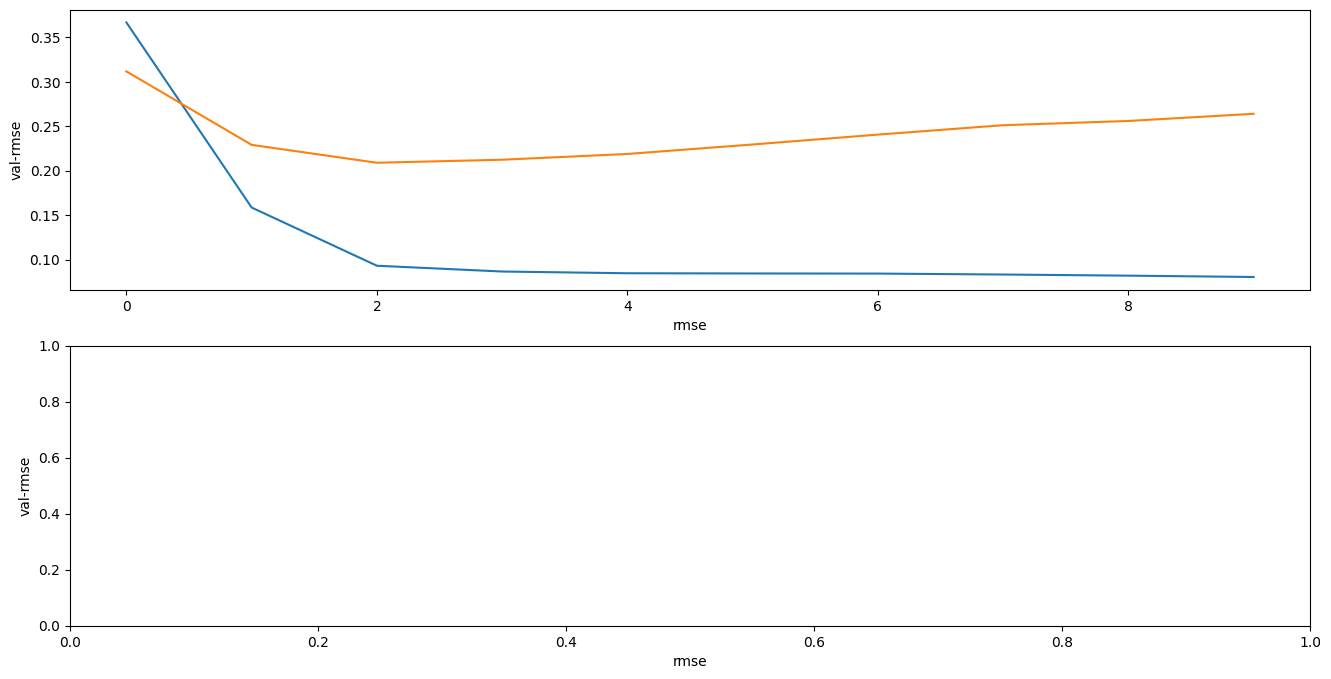

In [172]:
fig, ax = plt.subplots(2, figsize=(16, 8))

mt = history.history['root_mean_squared_error']
mv = history.history['val_root_mean_squared_error']

ax[0].plot(mt)
ax[0].plot(mv)

for plot in ax.flat:
    plot.set(xlabel='rmse', ylabel='val-rmse')

plt.show()

In [173]:
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_course_ids = [
    cn_encoded_to_cn.get(courses_not_enrolled[x][0]) for x in top_ratings_indices
]

print('Menampilkan rekomendasi course: {}'.format(course_sample))
print('===' * 9)
print('Menampilkan course dengan rating tinggi')
print('----' * 8)

top_course_by_rating = (
    courses_enrolled.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(15)
    .rating.values
)

courses_rows = courses[courses['rating'].isin(top_course_by_rating)]
for row in courses_rows.itertuples():
    print(row.courseName)

print('----' * 8)
print('Top 10 rekomendasi course Coursera')
print('----' * 8)

recommended_courses = courses[courses['rating'].isin(recommended_course_ids)]
for row in recommended_courses.itertuples():
    print(row.courseName)


Menampilkan rekomendasi course: 2308
Menampilkan course dengan rating tinggi
--------------------------------
Real-time OCR and Text Detection with Tensorflow, OpenCV and Tesseract
Marketing Analytics Capstone Project
Internet of Things: How did we get here?
Practical Reinforcement Learning
Mastering Digital Twins
Optical Efficiency and Resolution
Writing Stories About Ourselves
Big Data Applications: Machine Learning at Scale
Transistor - Field Effect Transistor and Bipolar Junction Transistor
Statistical Data Visualization in Python
Mathematical Game Theory
Wind resources for renewable energies
Getting Started with ASP.NET Core Razor Pages
Graphing with ggplot2
Data in Database
Simulation and modeling of natural processes
Exploring Emerging Technologies for Lifelong Learning and Success
Continuous Integration
--------------------------------
Top 10 rekomendasi course Coursera
--------------------------------
